<a href="https://colab.research.google.com/github/adriana-takahagui/FLAI_7_Competicao_ML/blob/main/FLAI_7_Competicao_DRAFT_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7ª Competição de Machine Learning (FLAI)

## **Detalhes técnicos**


● Trata-se de um problema de **REGRESSÃO**! <br>

● Dados de treinamento: (15000, 11) - variável resposta **“remuneracao”**. <br>
● Dados de teste: (15000, 10) - não contém a variável resposta. <br>

● Métrica alvo: o modelo com o **menor EMA (Erro Médio Absoluto)**, ganha! <br>

**Dados**: Trata-se de um conjunto de dados de anonimizado, com variáveis contínuas e categóricas, listadas
conforme o dicionário de variáveis.

## **Dicionário de Variáveis**


| Atributo	| Descrição |
|-----------|-----------| 
| 'sexo' | Sexo do Trabalhador | 
| 'idade' | Idade do Trabalhador | 
| 'faixa_etaria' | Faixa_Etaria do Trabalhador | 
| 'cor_raca'| Raça e Cor do Trabalhador | 
| 'escolaridade' | Grau de instrução do Trabalhador | 
| 'horas_trabalho_por_semana' | Quantidade de horas contratuais por semana | 
| 'portador_de_deficiencia' | Indicador se o empregado/servidor de portador de deficiência habilitado ou beneficiário reabilitado | 
| 'tamanho_da_empresa' | Tamanho da empresa em categoria de número de empregados ativos | 
| 'tempo_no_emprego'| Tempo de emprego do trabalhador (em meses) | 
| 'remuneracao'	| Remuneracao do Trabalhador (em reais) | 

## **Rótulo dos Valores**

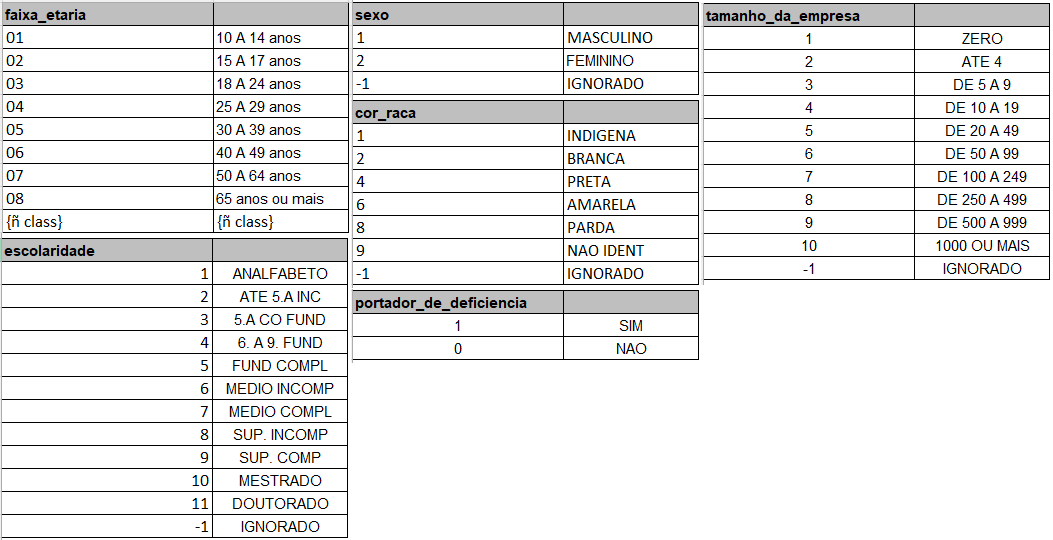

Abaixo segue sequência dos códigos e lógica desenvolvidos para a **7ª Competição de Machine Learning da FLAI**, em que obtive o **3º lugar**.

# Importação dos Dados

In [ ]:
import pandas as pd

treino = pd.read_csv('/content/treino.csv')
teste = pd.read_csv('/content/teste.csv')

treino.head()

,sexo,idade,faixa_etaria,cor_raca,escolaridade,horas_trabalho_por_semana,portador_de_deficiencia,tamanho_da_empresa,tempo_no_emprego,remuneracao,id
0,1,31,5,8,7,44,0,10,3.8,2551.21,1559958
1,1,58,7,8,7,44,0,3,1.9,3248.53,520410
2,2,58,7,99,7,30,0,7,255.9,1662.69,2373235
3,1,29,4,8,7,44,0,8,0.4,918.82,1358000
4,1,54,7,99,9,40,0,10,132.9,6479.11,155786


In [ ]:
treino.shape

(15000, 11)

# Análise Exploratória de Dados (Sweetviz)

In [ ]:
# Instalando o Sweetviz

!pip install sweetviz

     |████████████████████████████████| 15.1 MB 4.4 MB/s 


                                             |          | [  0%]   00:00 -> (? left)


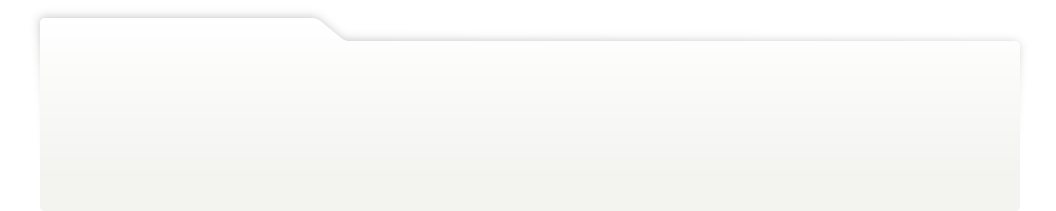
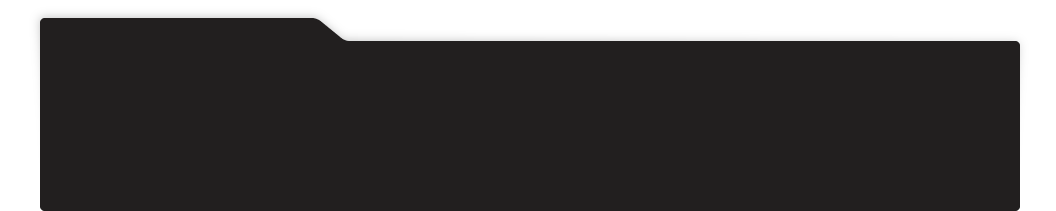
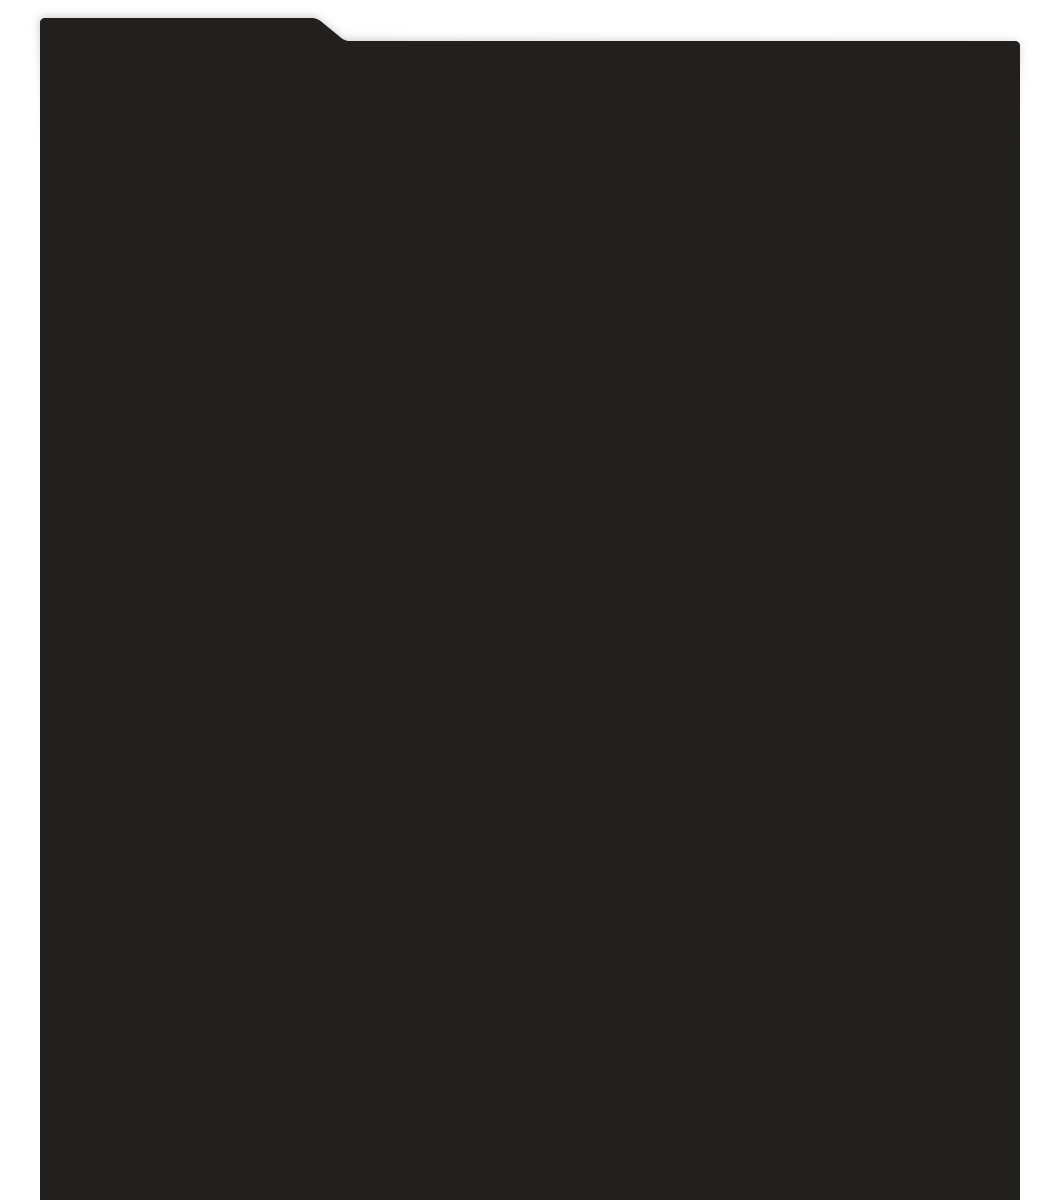
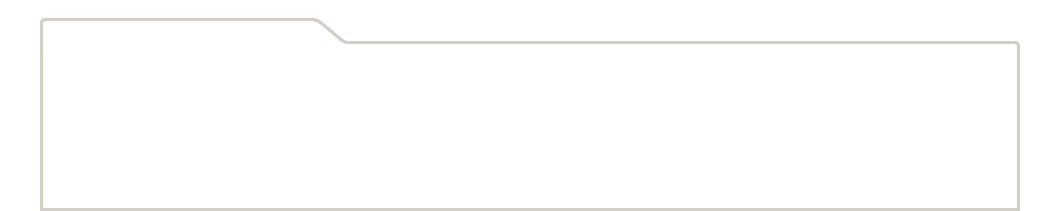
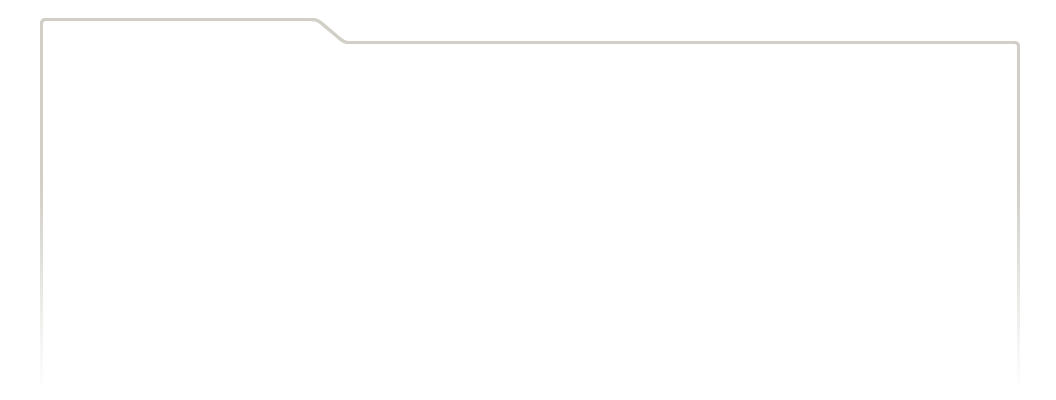
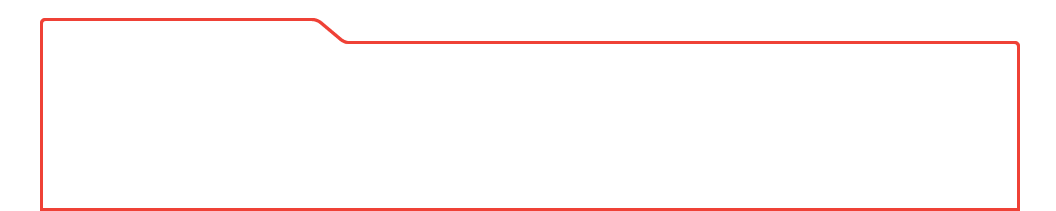
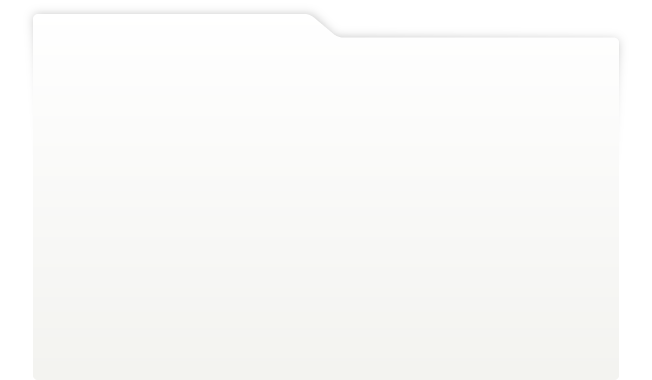
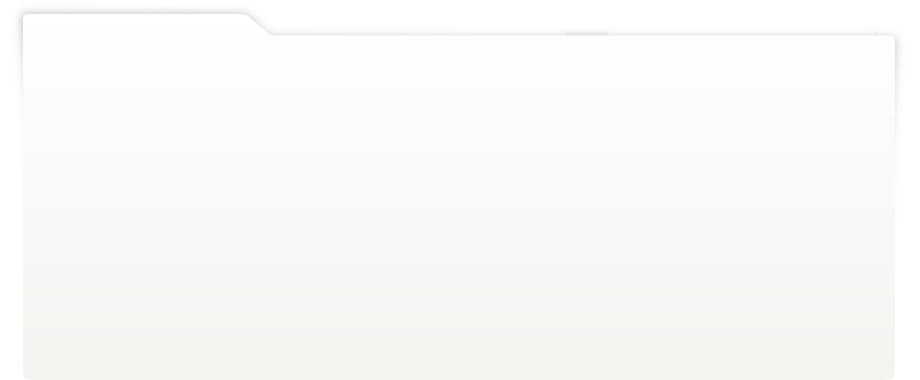
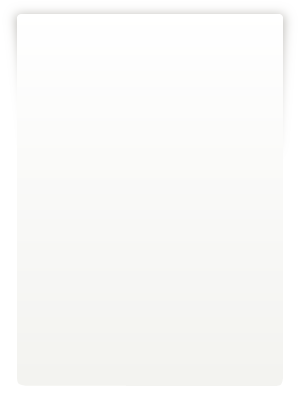
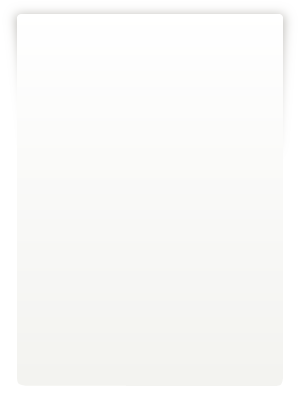
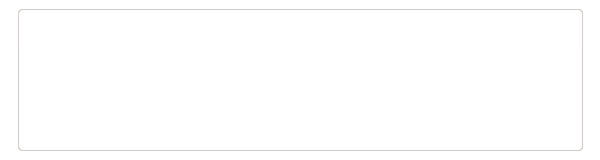
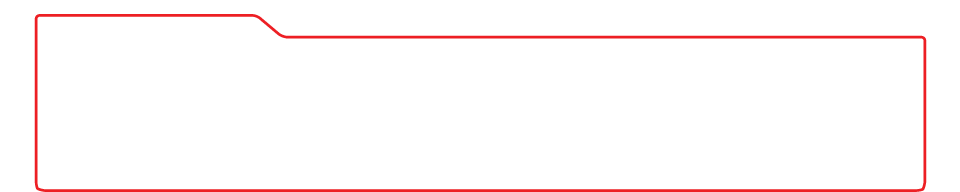
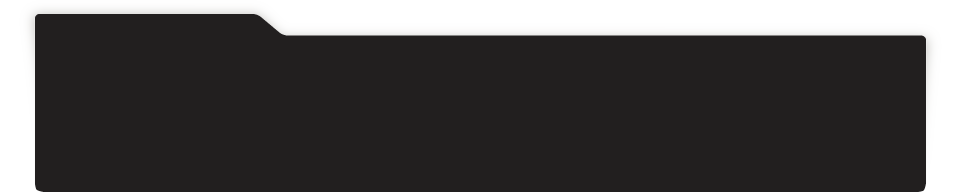
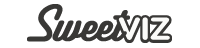
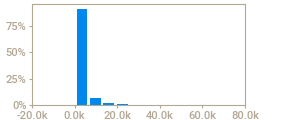
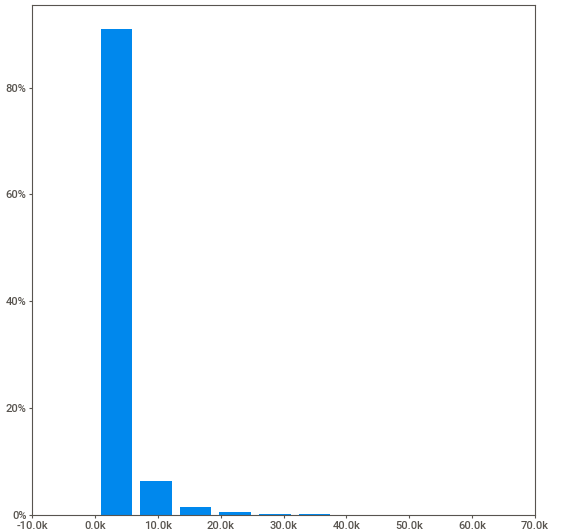
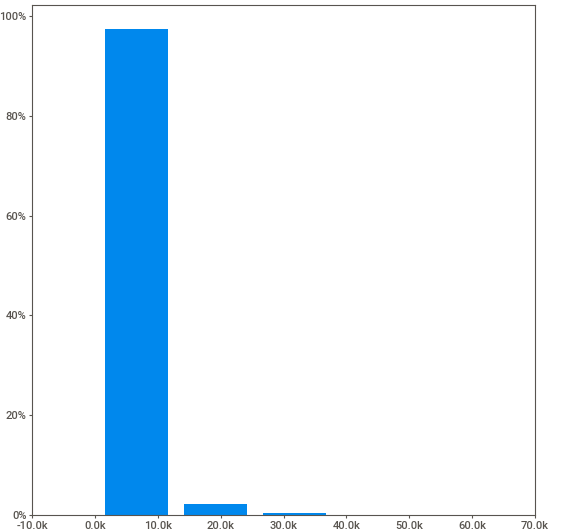
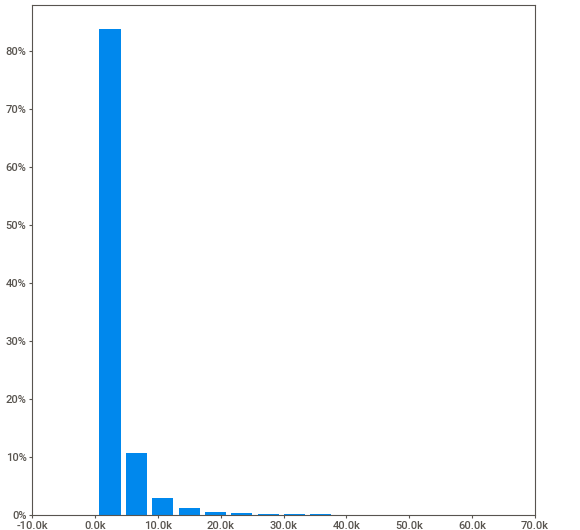
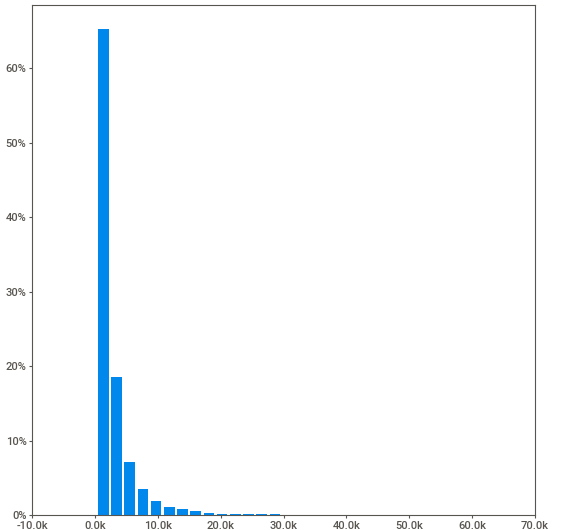
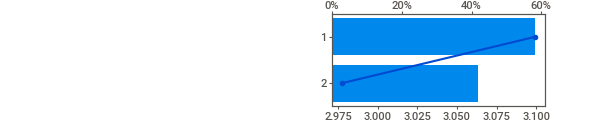
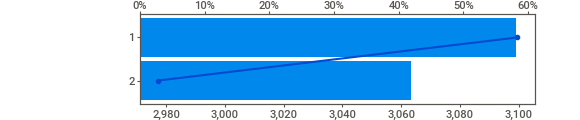
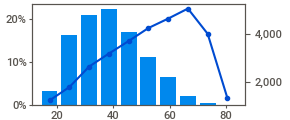
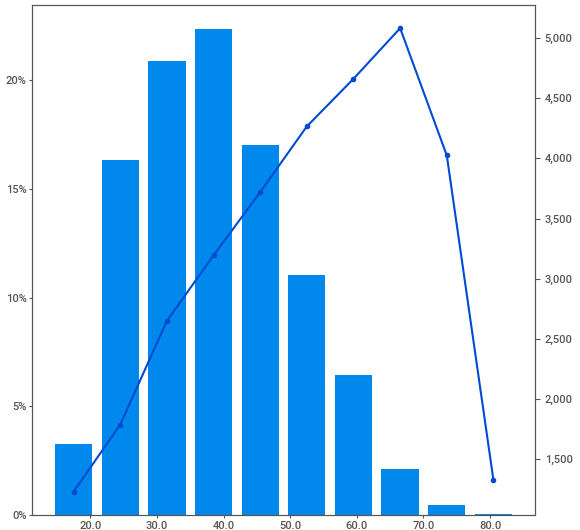
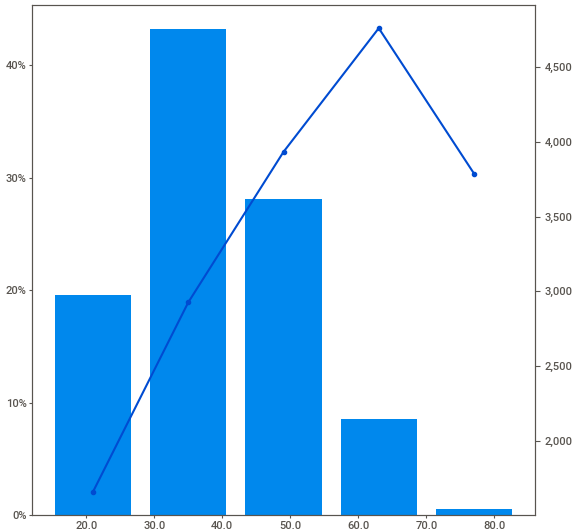
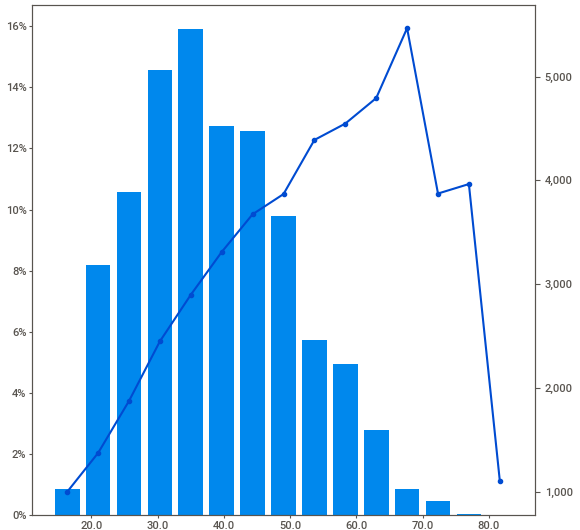
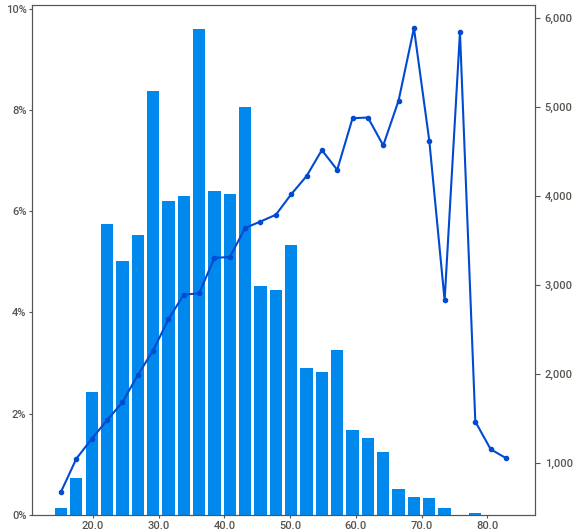
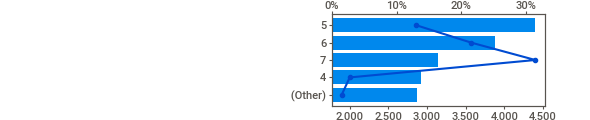
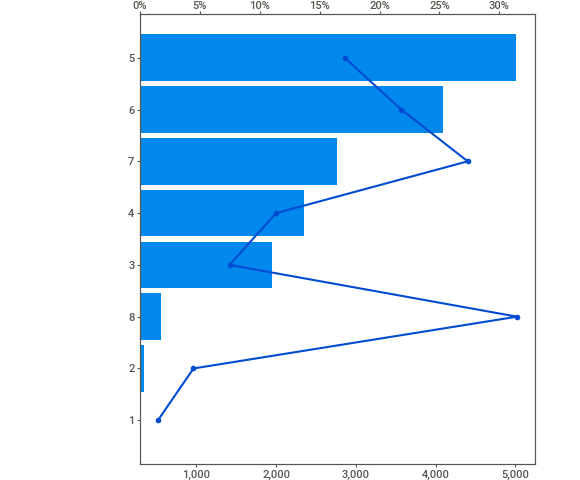
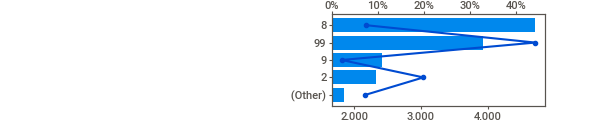
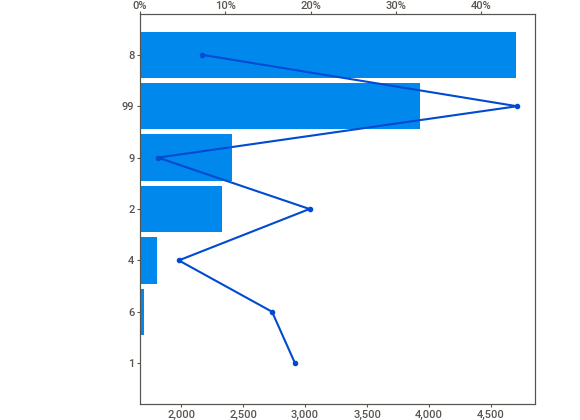
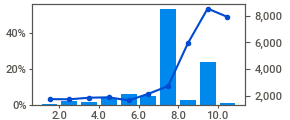
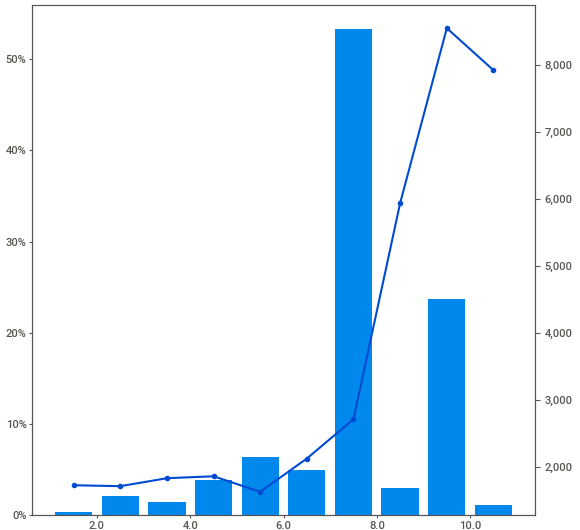
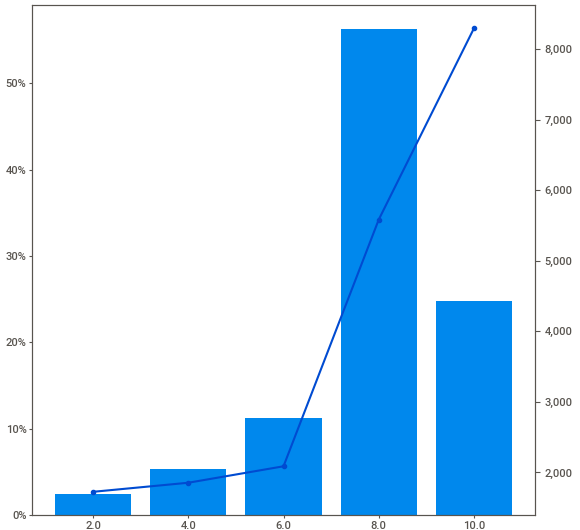
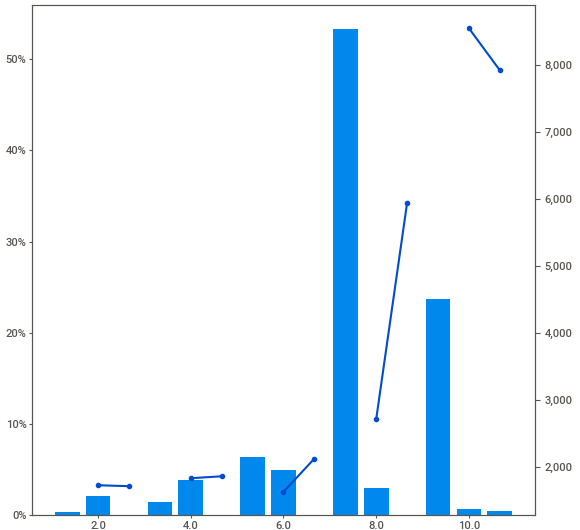
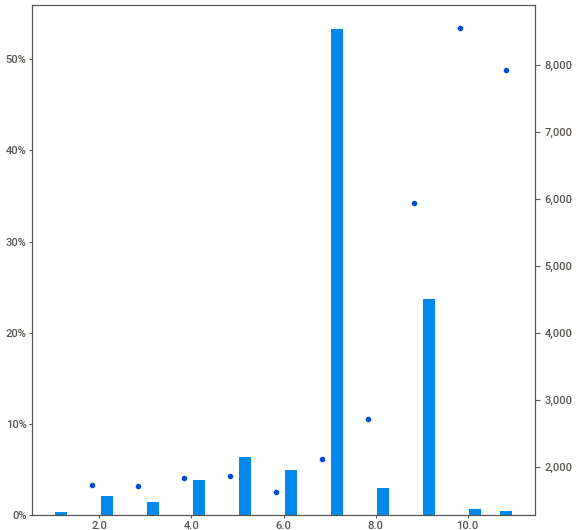
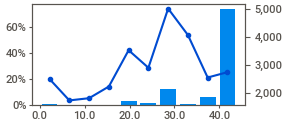
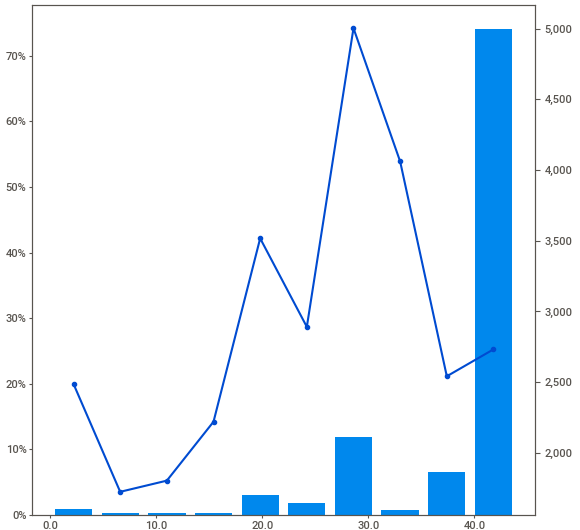
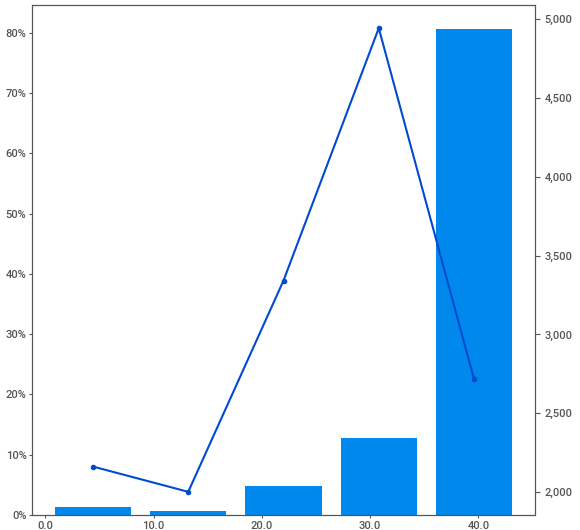
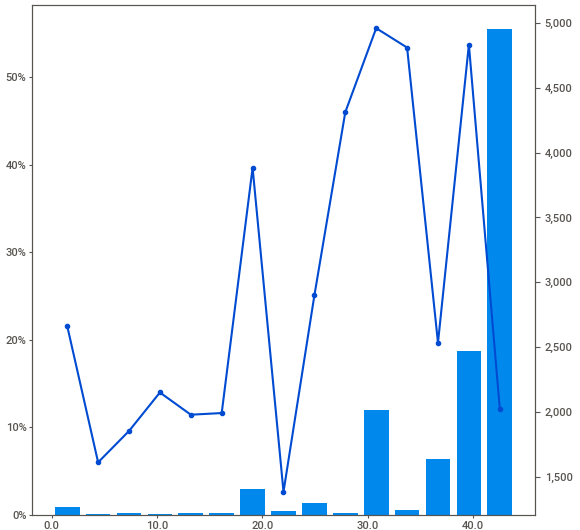
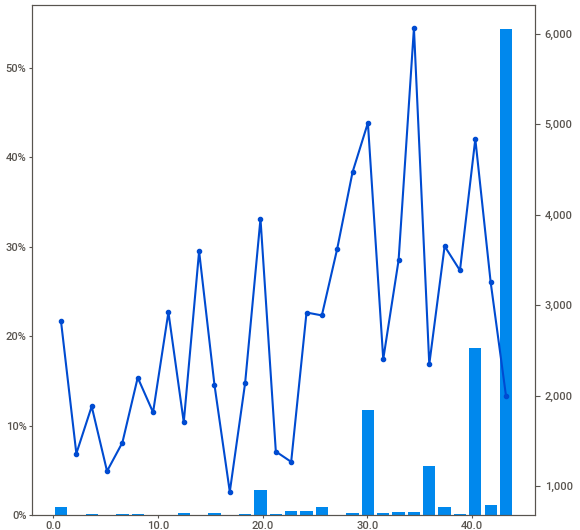
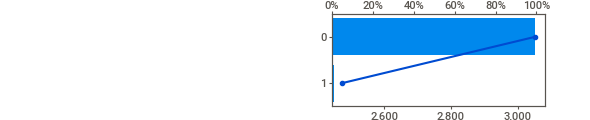
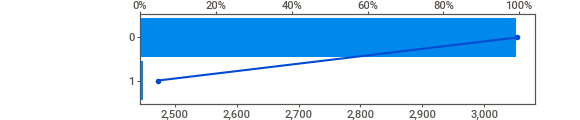
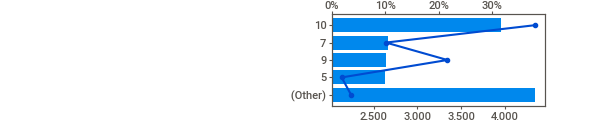
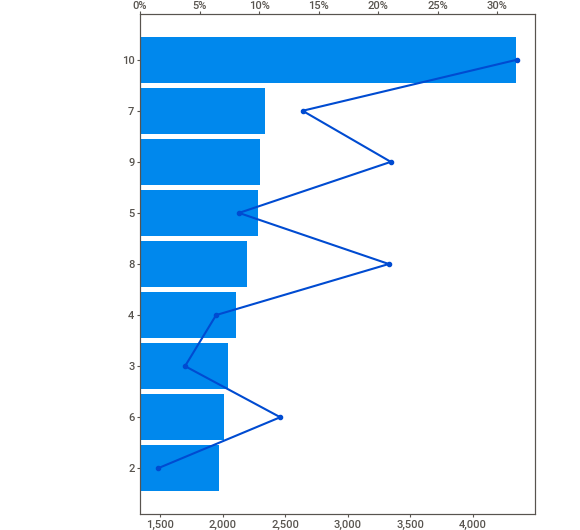
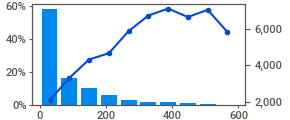
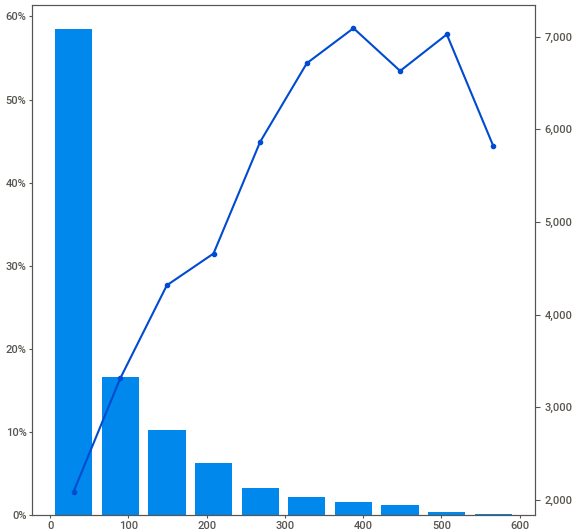
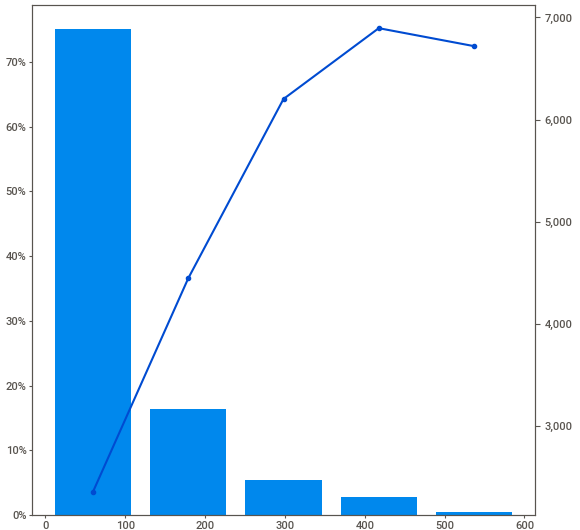
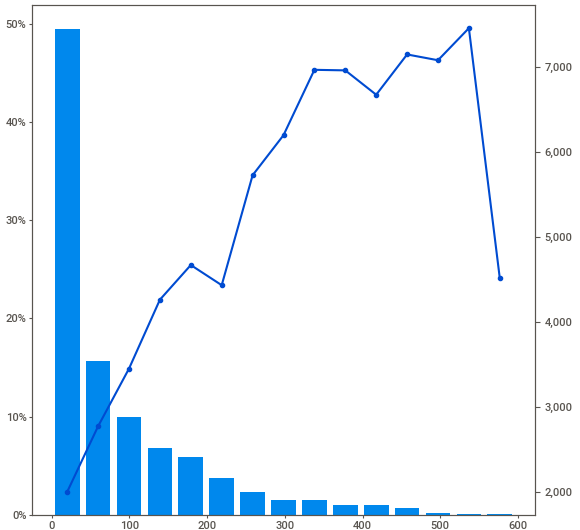
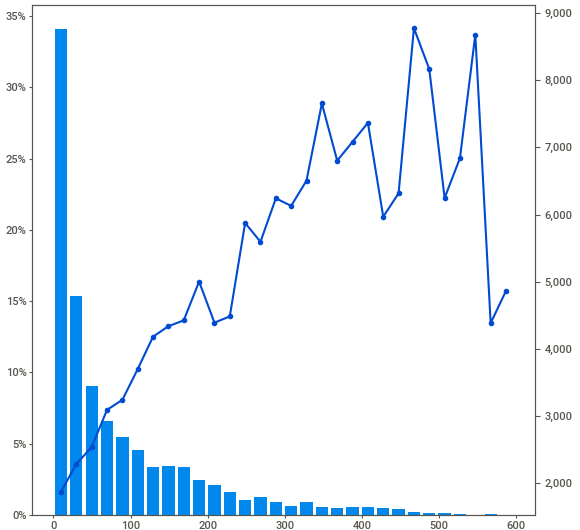
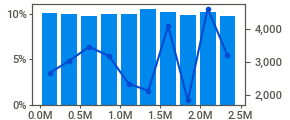
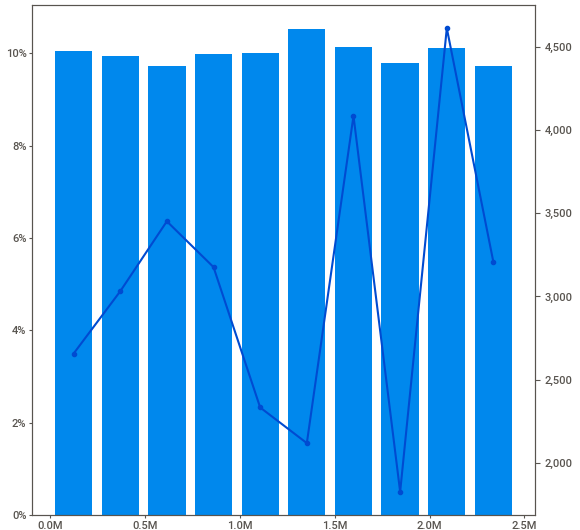
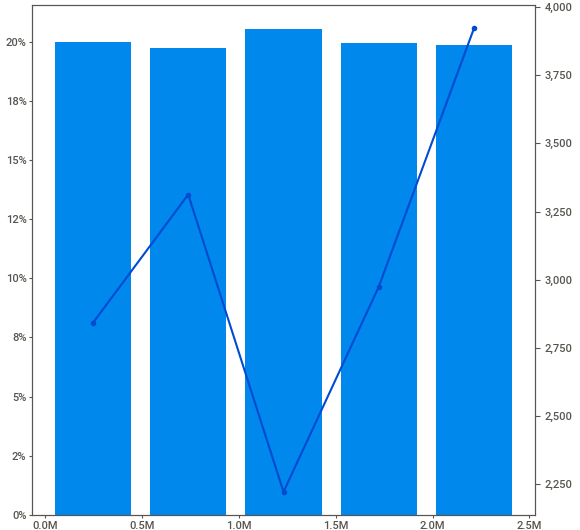
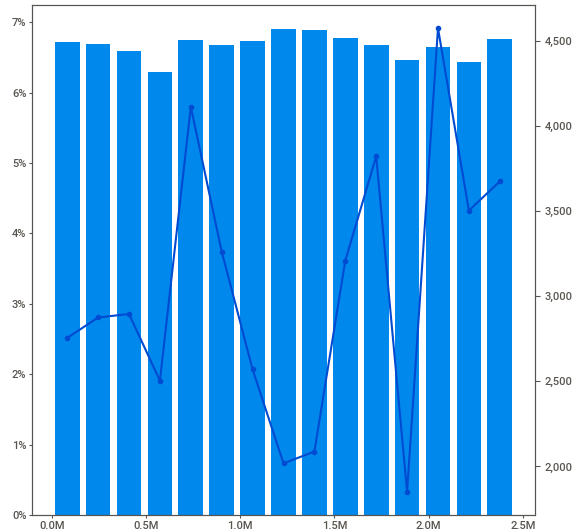
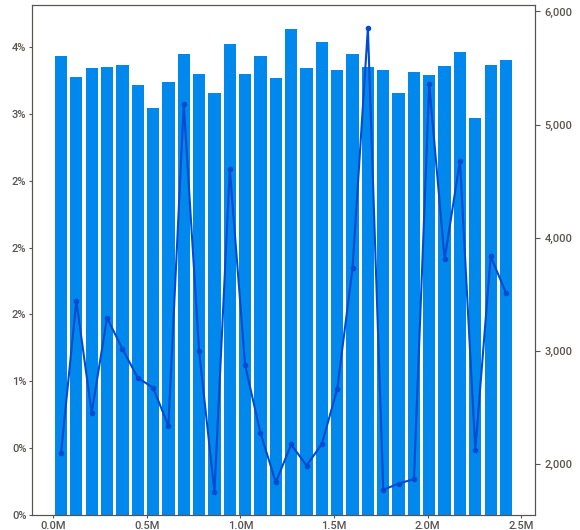
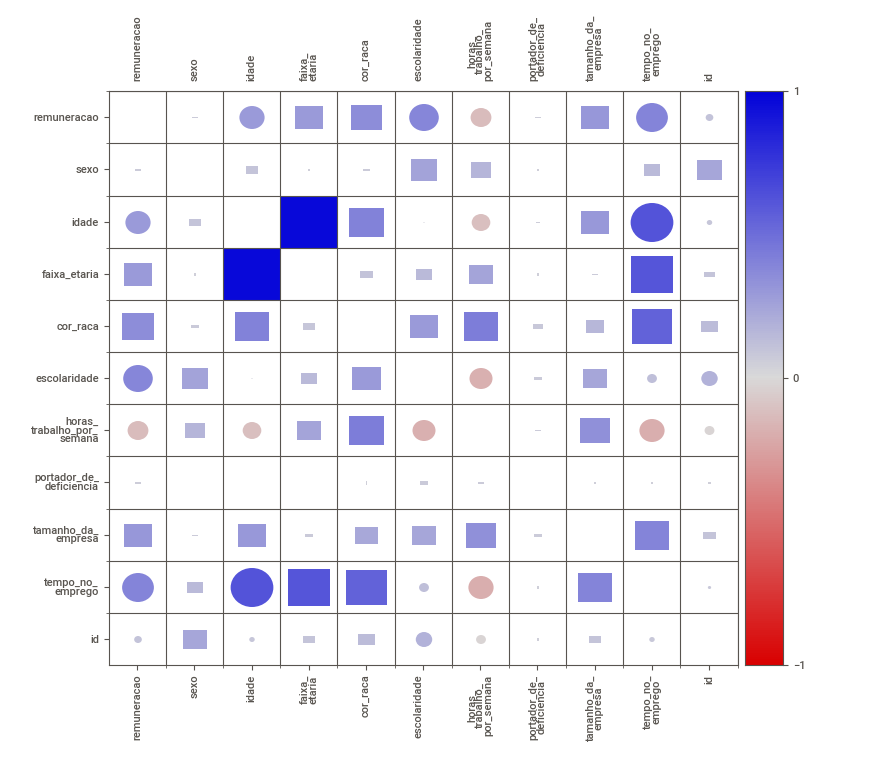
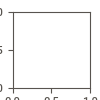

In [ ]:
import sweetviz as sv

eda = sv.analyze(source = treino, target_feat = 'remuneracao')
eda.show_notebook()

**Conclusões Importantes para o Pré-Processamento**

- A variável 'portador_de_deficiencia' possui apenas 2 opções e uma delas possui pouca variância (ou seja, a maioria é não portador de deficiência). Logo, decidi descartar esta variável.
- As variáveis 'idade' e 'faixa_etaria' possuem a mesma informação. Logo, decidi descartar a variável 'idade'. 
- Variável 'faixa_etaria': a média de remuneração aumenta com o aumento da faixa etária. Assim, decidi tratar como variável contínua.
- Variável 'escolaridade': a média de remuneração aumenta com o aumento da escolaridade. Assim, decidi tratar como variável contínua.
- Variável 'tamanho_da_empresa': a média de remuneração aumenta com o aumento do tamanho da empresa. Assim, decidi tratar como variável contínua.

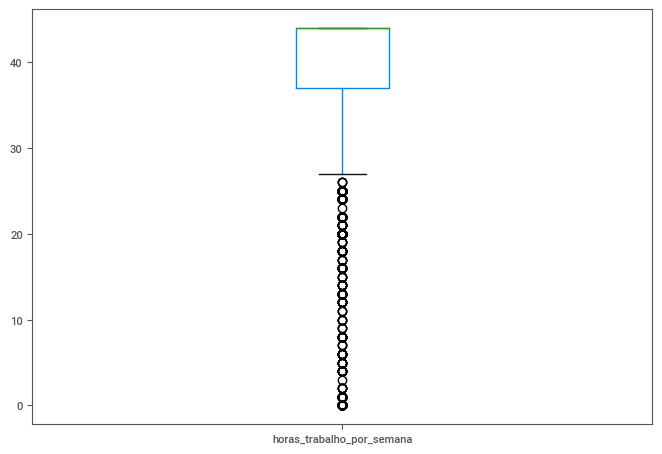

In [ ]:
# Verificando Outliers em 'horas_trabalho_por_semana'

treino['horas_trabalho_por_semana'].plot(kind = 'box');

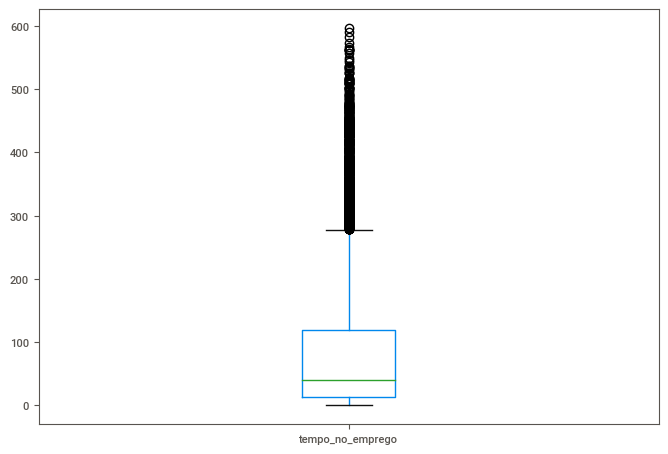

In [ ]:
# Verificando Outliers em 'tempo_no_emprego'

treino['tempo_no_emprego'].plot(kind = 'box');

# Pré-Processamento (Treino e Teste)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Descarte das variáveis não importantes
treino.drop(['id', 'idade', 'portador_de_deficiencia'], axis = 1, inplace = True)
teste.drop(['id', 'idade', 'portador_de_deficiencia'], axis = 1, inplace = True)

# Remoção de Outliers - Horas de Trabalho por semana
bottom_horas = treino['horas_trabalho_por_semana'].quantile(0.025)
treino.loc[treino['horas_trabalho_por_semana'] < bottom_horas, 'horas_trabalho_por_semana'] = bottom_horas
bottom_horas = teste['horas_trabalho_por_semana'].quantile(0.025)
teste.loc[teste['horas_trabalho_por_semana'] < bottom_horas, 'horas_trabalho_por_semana'] = bottom_horas

# Remoção de Outliers - Tempo no emprego
top_tempo = treino['tempo_no_emprego'].quantile(0.975)
treino.loc[treino['tempo_no_emprego'] > top_tempo, 'tempo_no_emprego'] = top_tempo
top_tempo = teste['tempo_no_emprego'].quantile(0.975)
teste.loc[teste['tempo_no_emprego'] > top_tempo, 'tempo_no_emprego'] = top_tempo

# Divisão da variável resposta por 1.000 (ou seja, analisando por 1.000 reais)
treino['remuneracao'] = treino['remuneracao'] / 1000

# Criaçã da variável horas de trabalho por mês
treino['horas_trabalho_mes'] = treino['horas_trabalho_por_semana'] * 4
teste['horas_trabalho_mes'] = teste['horas_trabalho_por_semana'] * 4

# Dummyficação das Variáveis Categóricas
variaveis_categoricas = ['sexo', 'cor_raca']
treino = pd.get_dummies(treino, columns = variaveis_categoricas, drop_first = True)
teste = pd.get_dummies(teste, columns = variaveis_categoricas, drop_first = True)

# Escala de Variáveis Contínuas
sc = StandardScaler() # zscore
treino['tempo_no_emprego'] = sc.fit_transform(treino[['tempo_no_emprego']])
teste['tempo_no_emprego'] = sc.fit_transform(teste[['tempo_no_emprego']])

treino['horas_trabalho_mes'] = sc.fit_transform(treino[['horas_trabalho_mes']])
teste['horas_trabalho_mes'] = sc.fit_transform(teste[['horas_trabalho_mes']])

minmax = MinMaxScaler() # minmax
treino['horas_trabalho_por_semana'] = minmax.fit_transform(treino[['horas_trabalho_por_semana']])
teste['horas_trabalho_por_semana'] = minmax.fit_transform(teste[['horas_trabalho_por_semana']])

treino['tamanho_da_empresa'] = minmax.fit_transform(treino[['tamanho_da_empresa']])
teste['tamanho_da_empresa'] = minmax.fit_transform(teste[['tamanho_da_empresa']])

treino['escolaridade'] = minmax.fit_transform(treino[['escolaridade']])
teste['escolaridade'] = minmax.fit_transform(teste[['escolaridade']])

treino['faixa_etaria'] = treino[['faixa_etaria']] / 10
teste['faixa_etaria'] = teste[['faixa_etaria']] / 10

treino.head()

,faixa_etaria,escolaridade,horas_trabalho_por_semana,tamanho_da_empresa,tempo_no_emprego,remuneracao,horas_trabalho_mes,sexo_2,cor_raca_2,cor_raca_4,cor_raca_6,cor_raca_8,cor_raca_9,cor_raca_99
0,0.5,0.6,1.000000,1.000,-0.813288,2.55121,0.673922,0,0,0,0,1,0,0
1,0.7,0.6,1.000000,0.125,-0.833086,3.24853,0.673922,0,0,0,0,1,0,0
2,0.7,0.6,0.416667,0.625,1.813583,1.66269,-1.393897,1,0,0,0,0,0,1
3,0.4,0.6,1.000000,0.750,-0.848715,0.91882,0.673922,0,0,0,0,1,0,0
4,0.7,0.8,0.833333,1.000,0.531929,6.47911,0.083116,0,0,0,0,0,0,1


In [ ]:
teste.head()

,faixa_etaria,escolaridade,horas_trabalho_por_semana,tamanho_da_empresa,tempo_no_emprego,horas_trabalho_mes,sexo_2,cor_raca_2,cor_raca_4,cor_raca_6,cor_raca_8,cor_raca_9,cor_raca_99
0,0.6,0.6,1.000000,0.375,-0.740821,0.671279,0,0,0,0,1,0,0
1,0.5,0.7,1.000000,0.000,-0.424709,0.671279,0,1,0,0,0,0,0
2,0.7,0.8,0.416667,1.000,2.980764,-1.391838,1,0,0,0,0,0,1
3,0.6,0.6,1.000000,1.000,0.519464,0.671279,0,0,0,0,1,0,0
4,0.7,0.6,0.916667,1.000,-0.739781,0.376548,0,0,0,0,1,0,0


# Transformação da Variável Resposta

In [ ]:
treino['remuneracao'].describe()

count    15000.000000
mean         3.048330
std          3.783080
min          0.301430
25%          1.274707
50%          1.764360
75%          3.213360
max         63.218070
Name: remuneracao, dtype: float64

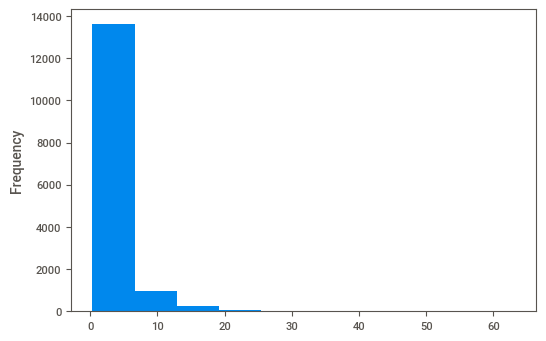

In [ ]:
treino['remuneracao'].plot(kind = 'hist')

In [ ]:
from sklearn.preprocessing import PowerTransformer

power = PowerTransformer(method = 'box-cox') 
treino['remuneracao'] = power.fit_transform(treino[['remuneracao']])

treino.head()

,faixa_etaria,escolaridade,horas_trabalho_por_semana,tamanho_da_empresa,tempo_no_emprego,remuneracao,horas_trabalho_mes,sexo_2,cor_raca_2,cor_raca_4,cor_raca_6,cor_raca_8,cor_raca_9,cor_raca_99
0,0.5,0.6,1.000000,1.000,-0.813288,0.415214,0.673922,0,0,0,0,1,0,0
1,0.7,0.6,1.000000,0.125,-0.833086,0.728181,0.673922,0,0,0,0,1,0,0
2,0.7,0.6,0.416667,0.625,1.813583,-0.236732,-1.393897,1,0,0,0,0,0,1
3,0.4,0.6,1.000000,0.750,-0.848715,-1.392461,0.673922,0,0,0,0,1,0,0
4,0.7,0.8,0.833333,1.000,0.531929,1.446094,0.083116,0,0,0,0,0,0,1


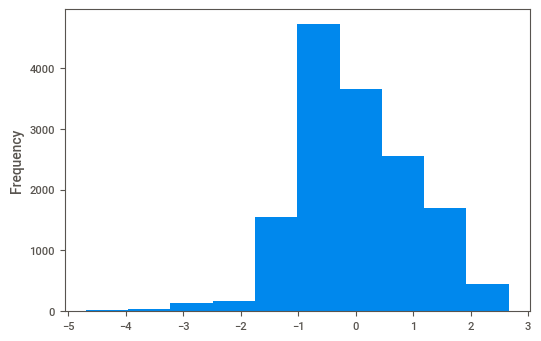

In [ ]:
treino['remuneracao'].plot(kind = 'hist')

# Modelo com PyCaret

In [ ]:
# Instalando o PyCaret

!pip install pycaret

     |████████████████████████████████| 301 kB 8.2 MB/s 
     |████████████████████████████████| 56 kB 2.0 MB/s 
     |████████████████████████████████| 1.3 MB 34.6 MB/s 
     |████████████████████████████████| 86 kB 3.4 MB/s 
     |████████████████████████████████| 167 kB 20.1 MB/s 
     |████████████████████████████████| 1.7 MB 42.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 261 kB 50.5 MB/s 
     |████████████████████████████████| 114 kB 56.6 MB/s 
     |████████████████████████████████| 6.8 MB 59.1 MB/s 
     |████████████████████████████████| 15.6 MB 49.8 MB/s 
     |████████████████████████████████| 2.0 MB 45.9 MB/s 
     |████████████████████████████████| 636 kB 29.7 MB/s 
     |████████████████████████████████| 102 kB 8.8 MB/s 
     |████████████████████████████████| 303 kB 59.2 MB/s 
     |██████████████████

In [ ]:
# Configurando o modelo

from pycaret.regression import * 

regressao = setup(data = treino, 
                  target = 'remuneracao', # variável resposta
                  feature_interaction = True, 
                  feature_ratio = True,
                  ignore_low_variance = True,
                  remove_multicollinearity = True, 
                  multicollinearity_threshold = 0.95)

,Description,Value
0,session_id,7879
1,Target,remuneracao
2,Original Data,"(15000, 14)"
3,Missing Values,False
4,Numeric Features,13
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(10499, 13)"


In [ ]:
regressao[19]

,faixa_etaria,escolaridade,tamanho_da_empresa,tempo_no_emprego,horas_trabalho_mes,sexo_2,cor_raca_2,cor_raca_8,cor_raca_9,cor_raca_99,tempo_no_emprego_multiply_escolaridade,escolaridade_multiply_faixa_etaria,escolaridade_multiply_tamanho_da_empresa
12713,0.5,0.7,0.625,0.789302,-0.507689,1,0,0,0,1,0.552511,0.35,0.4375
1662,0.6,0.6,0.625,-0.051589,0.673922,0,0,1,0,0,-0.030953,0.36,0.3750
14079,0.3,0.7,0.125,-0.791406,0.673922,0,0,0,1,0,-0.553984,0.21,0.0875
1959,0.5,0.6,0.000,-0.510067,0.673922,0,0,0,1,0,-0.306040,0.30,0.0000
10498,0.5,0.8,0.750,-0.146410,0.083116,1,0,0,0,1,-0.117128,0.40,0.6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5828,0.7,0.6,0.625,2.434613,-1.393897,1,0,0,0,1,1.460768,0.42,0.3750
2508,0.6,0.8,1.000,0.263094,-1.393897,1,0,0,0,1,0.210475,0.48,0.8000
9052,0.6,0.1,0.250,-0.596553,0.673922,0,0,0,0,0,-0.059655,0.06,0.0250
11203,0.5,0.6,0.375,-0.703878,0.673922,0,0,0,1,0,-0.422327,0.30,0.2250


In [ ]:
# Guardando os 5 melhores modelos

melhores = compare_models(sort = 'MAE', n_select = 5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.5166,0.4716,0.6863,0.5305,0.3132,2.5357,0.162
gbr,Gradient Boosting Regressor,0.5220,0.4743,0.6883,0.5280,0.3157,2.4392,0.850
rf,Random Forest Regressor,0.5416,0.5262,0.7251,0.4762,0.3205,2.8038,3.420
et,Extra Trees Regressor,0.5772,0.6055,0.7778,0.3971,0.3302,2.9516,2.249
knn,K Neighbors Regressor,0.5781,0.5902,0.7680,0.4122,0.3388,2.7726,0.081
huber,Huber Regressor,0.5806,0.5863,0.7654,0.4164,0.3525,2.9954,0.180
ridge,Ridge Regression,0.5813,0.5849,0.7646,0.4177,0.3533,2.9960,0.015
br,Bayesian Ridge,0.5814,0.5848,0.7645,0.4178,0.3533,3.0064,0.019
lr,Linear Regression,0.5815,0.5847,0.7644,0.4180,0.3535,3.0435,0.321
ada,AdaBoost Regressor,0.6300,0.6713,0.8192,0.3314,0.3545,2.8291,0.254


In [ ]:
melhores

[LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=7879, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.1, loss='ls', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                 

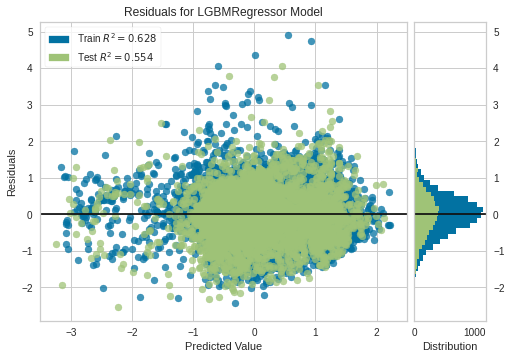

In [ ]:
# Plotando o gráfico de Residuals do 1º melhor modelo: LGBMRegressor

plot_model(melhores[0])

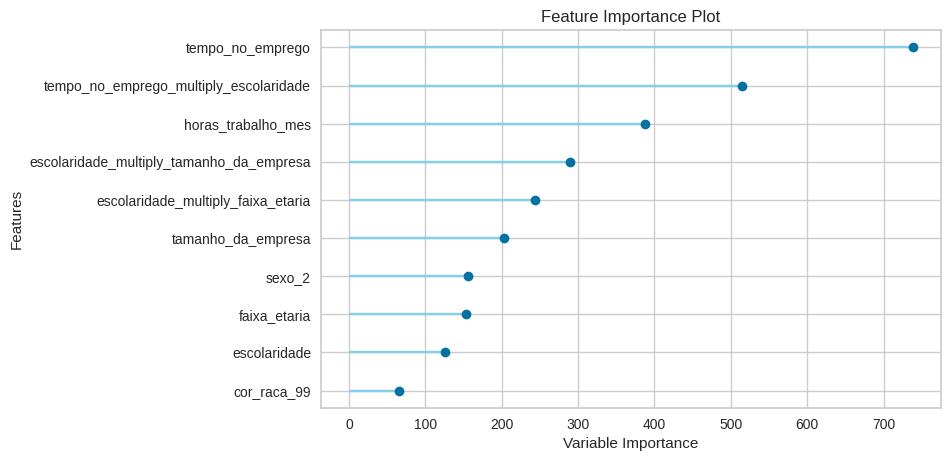

In [ ]:
# Importância das variáveis do 1º melhor modelo: LGBMRegressor

plot_model(melhores[0], 'feature')

In [ ]:
# Tunagem dos 5 melhores modelos

melhores_tunados = []

for i in range(len(melhores)):
    melhores_tunados.append(tune_model(melhores[i], optimize = 'MAE'))

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5491,0.5294,0.7276,0.4875,0.3315,1.8884
1,0.5370,0.4994,0.7067,0.4910,0.3224,1.4992
2,0.5599,0.5646,0.7514,0.4512,0.3258,1.7557
3,0.5567,0.5639,0.7509,0.4707,0.3355,1.8474
4,0.5531,0.5306,0.7284,0.4404,0.3299,3.8292
5,0.5590,0.5381,0.7335,0.4960,0.3342,1.5712
6,0.5521,0.5447,0.7380,0.4200,0.3287,2.7565
7,0.5540,0.5583,0.7472,0.4428,0.3271,1.9726
8,0.5550,0.5418,0.7360,0.4592,0.3371,2.7606
9,0.5463,0.5185,0.7201,0.4719,0.3255,5.4683


In [ ]:
melhores_tunados

[LGBMRegressor(bagging_fraction=0.9, bagging_freq=1, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=1.0,
               importance_type='split', learning_rate=0.2, max_depth=-1,
               min_child_samples=16, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=200, n_jobs=-1, num_leaves=90, objective=None,
               random_state=7879, reg_alpha=0.7, reg_lambda=1e-06, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.05, loss='ls', max_depth=9,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.2, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=9,
                           min_weight_fraction_leaf=0.0, n_estimators=80,
          

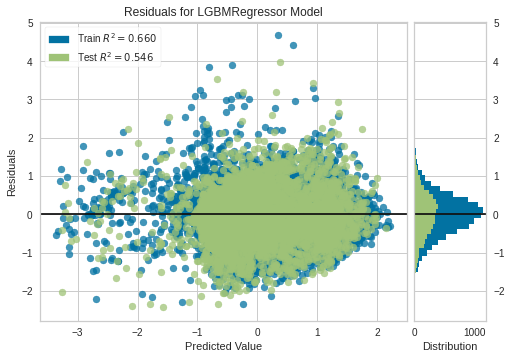

In [ ]:
# Plotando o gráfico de Residuals do 1º melhor modelo tunado: LGBMRegressor

plot_model(melhores_tunados[0])

In [ ]:
# Combinando os 5 melhores modelos tunados

modelo_combinado = blend_models(melhores_tunados)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5053,0.4488,0.6700,0.5655,0.3139,1.6896
1,0.5122,0.4404,0.6636,0.5512,0.3096,1.5509
2,0.5294,0.5182,0.7199,0.4964,0.3158,1.6849
3,0.5324,0.5159,0.7182,0.5158,0.3228,1.7609
4,0.5071,0.4327,0.6578,0.5437,0.3074,4.0444
5,0.5306,0.4844,0.6960,0.5462,0.3166,1.4963
6,0.5142,0.4665,0.6830,0.5032,0.3094,2.4940
7,0.5179,0.4983,0.7059,0.5026,0.3127,2.1264
8,0.5137,0.4637,0.6810,0.5371,0.3187,2.7014
9,0.5141,0.4525,0.6727,0.5392,0.3090,5.1710


In [ ]:
modelo_combinado

VotingRegressor(estimators=[('lightgbm',
                             LGBMRegressor(bagging_fraction=0.9, bagging_freq=1,
                                           boosting_type='gbdt',
                                           class_weight=None,
                                           colsample_bytree=1.0,
                                           feature_fraction=1.0,
                                           importance_type='split',
                                           learning_rate=0.2, max_depth=-1,
                                           min_child_samples=16,
                                           min_child_weight=0.001,
                                           min_split_gain=0.3, n_estimators=200,
                                           n_jobs=-1, num_leaves=90,
                                           objective=None, rando...
                                                 min_impurity_split=None,
                                                 min_

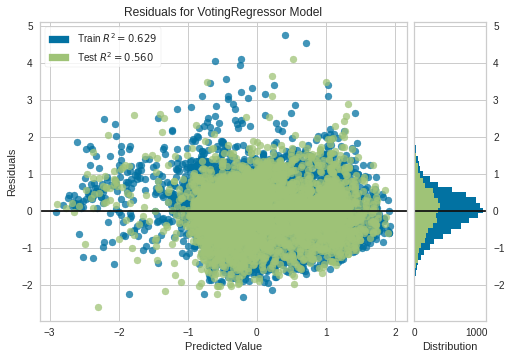

In [ ]:
# Plotando o gráfico de Residuals do modelo combinado

plot_model(modelo_combinado)

In [ ]:
# Performance nos dados de validação

pred = predict_model(modelo_combinado)
pred

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.5062,0.4341,0.6588,0.56,0.3033,3.4084


,faixa_etaria,escolaridade,tamanho_da_empresa,tempo_no_emprego,horas_trabalho_mes,sexo_2,cor_raca_2,cor_raca_8,cor_raca_9,cor_raca_99,tempo_no_emprego_multiply_escolaridade,escolaridade_multiply_faixa_etaria,escolaridade_multiply_tamanho_da_empresa,remuneracao,Label
0,0.5,0.7,0.625,0.789302,-0.507689,1,0,0,0,1,0.552511,0.35,0.4375,-0.422417,0.040965
1,0.6,0.6,0.625,-0.051589,0.673922,0,0,1,0,0,-0.030953,0.36,0.3750,0.350358,0.147156
2,0.3,0.7,0.125,-0.791406,0.673922,0,0,0,1,0,-0.553984,0.21,0.0875,-0.287643,-0.856494
3,0.5,0.6,0.000,-0.510067,0.673922,0,0,0,1,0,-0.306040,0.30,0.0000,-1.111648,-0.558270
4,0.5,0.8,0.750,-0.146410,0.083116,1,0,0,0,1,-0.117128,0.40,0.6000,2.023950,0.934155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4496,0.7,0.6,0.625,2.434613,-1.393897,1,0,0,0,1,1.460768,0.42,0.3750,0.967888,0.182539
4497,0.6,0.8,1.000,0.263094,-1.393897,1,0,0,0,1,0.210475,0.48,0.8000,1.131681,1.077978
4498,0.6,0.1,0.250,-0.596553,0.673922,0,0,0,0,0,-0.059655,0.06,0.0250,-0.322041,-0.396814
4499,0.5,0.6,0.375,-0.703878,0.673922,0,0,0,1,0,-0.422327,0.30,0.2250,-0.583800,-0.355797


In [ ]:
# Utilizando o modelo escolhido em todos os dados disponíveis para gerar o modelo final

modelo_final = finalize_model(modelo_combinado)

In [ ]:
modelo_final

VotingRegressor(estimators=[('lightgbm',
                             LGBMRegressor(bagging_fraction=0.9, bagging_freq=1,
                                           boosting_type='gbdt',
                                           class_weight=None,
                                           colsample_bytree=1.0,
                                           feature_fraction=1.0,
                                           importance_type='split',
                                           learning_rate=0.2, max_depth=-1,
                                           min_child_samples=16,
                                           min_child_weight=0.001,
                                           min_split_gain=0.3, n_estimators=200,
                                           n_jobs=-1, num_leaves=90,
                                           objective=None, rando...
                                                 min_impurity_split=None,
                                                 min_

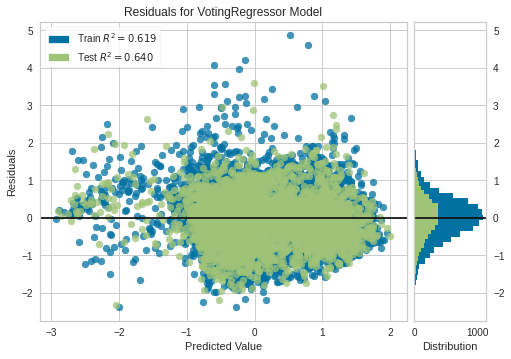

In [ ]:
# Plotando o gráfico de Residuals do modelo final

plot_model(modelo_final)

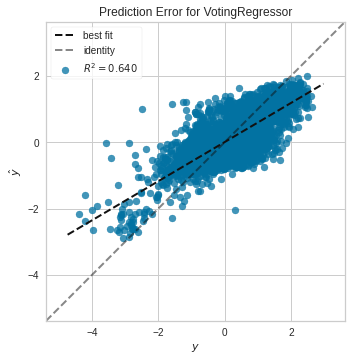

In [ ]:
# Plotando o gráfico de Erros do modelo final

plot_model(modelo_final, plot = 'error')

In [ ]:
# Salvando o modelo

nome_modelo = 'Modelo_FINAL'
save_model(modelo_final, nome_modelo)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='remuneracao', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                                                                   min_samples_leaf=2,
                                                                   min_samples_split=2,
                                                                   min_weight_fraction_leaf=0.0,
                                         

# Predição na Base Teste

In [ ]:
teste.head()

,faixa_etaria,escolaridade,horas_trabalho_por_semana,tamanho_da_empresa,tempo_no_emprego,horas_trabalho_mes,sexo_2,cor_raca_2,cor_raca_4,cor_raca_6,cor_raca_8,cor_raca_9,cor_raca_99
0,0.6,0.6,1.000000,0.375,-0.740821,0.671279,0,0,0,0,1,0,0
1,0.5,0.7,1.000000,0.000,-0.424709,0.671279,0,1,0,0,0,0,0
2,0.7,0.8,0.416667,1.000,2.980764,-1.391838,1,0,0,0,0,0,1
3,0.6,0.6,1.000000,1.000,0.519464,0.671279,0,0,0,0,1,0,0
4,0.7,0.6,0.916667,1.000,-0.739781,0.376548,0,0,0,0,1,0,0


In [ ]:
# Carregando o modelo salvo
modelo = load_model(nome_modelo)

# Realizando a predição
predicao = predict_model(modelo, data = teste)
predicao

Transformation Pipeline and Model Successfully Loaded


,faixa_etaria,escolaridade,horas_trabalho_por_semana,tamanho_da_empresa,tempo_no_emprego,horas_trabalho_mes,sexo_2,cor_raca_2,cor_raca_4,cor_raca_6,cor_raca_8,cor_raca_9,cor_raca_99,Label
0,0.6,0.6,1.000000,0.375,-0.740821,0.671279,0,0,0,0,1,0,0,-0.236195
1,0.5,0.7,1.000000,0.000,-0.424709,0.671279,0,1,0,0,0,0,0,-0.335140
2,0.7,0.8,0.416667,1.000,2.980764,-1.391838,1,0,0,0,0,0,1,1.413928
3,0.6,0.6,1.000000,1.000,0.519464,0.671279,0,0,0,0,1,0,0,0.358886
4,0.7,0.6,0.916667,1.000,-0.739781,0.376548,0,0,0,0,1,0,0,-0.005084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.7,0.6,0.833333,0.375,3.178333,0.081817,0,0,0,0,0,0,1,1.197462
14996,0.5,0.6,1.000000,0.250,-0.813609,0.671279,0,0,0,0,1,0,0,-0.523956
14997,0.5,0.4,0.666667,0.750,-0.253136,-0.507645,0,0,0,0,0,0,1,-0.386196
14998,0.3,0.6,1.000000,0.500,-0.824008,0.671279,1,0,0,0,1,0,0,-0.813149


In [ ]:
# Revertendo a transformação realizada na variável resposta

predicao['Label Transformed'] = power.inverse_transform(predicao[['Label']])

In [ ]:
predicao

,faixa_etaria,escolaridade,horas_trabalho_por_semana,tamanho_da_empresa,tempo_no_emprego,horas_trabalho_mes,sexo_2,cor_raca_2,cor_raca_4,cor_raca_6,cor_raca_8,cor_raca_9,cor_raca_99,Label,Label Transformed
0,0.6,0.6,1.000000,0.375,-0.740821,0.671279,0,0,0,0,1,0,0,-0.236195,1.663220
1,0.5,0.7,1.000000,0.000,-0.424709,0.671279,0,1,0,0,0,0,0,-0.335140,1.569600
2,0.7,0.8,0.416667,1.000,2.980764,-1.391838,1,0,0,0,0,0,1,1.413928,6.247810
3,0.6,0.6,1.000000,1.000,0.519464,0.671279,0,0,0,0,1,0,0,0.358886,2.449547
4,0.7,0.6,0.916667,1.000,-0.739781,0.376548,0,0,0,0,1,0,0,-0.005084,1.916881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.7,0.6,0.833333,0.375,3.178333,0.081817,0,0,0,0,0,0,1,1.197462,4.967010
14996,0.5,0.6,1.000000,0.250,-0.813609,0.671279,0,0,0,0,1,0,0,-0.523956,1.411345
14997,0.5,0.4,0.666667,0.750,-0.253136,-0.507645,0,0,0,0,0,0,1,-0.386196,1.524314
14998,0.3,0.6,1.000000,0.500,-0.824008,0.671279,1,0,0,0,1,0,0,-0.813149,1.211185


# Submissão

In [ ]:
# OBS: Multiplicando o valor final por mil, pois dividi a variável resposta por mil

submissao = pd.DataFrame()
submissao['remuneracao'] = predicao['Label Transformed'] * 1000
submissao

,remuneracao
0,1663.220298
1,1569.600168
2,6247.810330
3,2449.547398
4,1916.881217
...,...
14995,4967.010237
14996,1411.345444
14997,1524.314465
14998,1211.184625


In [ ]:
# Salvando a submissao em arquivo CSV

submissao.to_csv('submissão.csv', index = False)